# Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .


Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# There are no missing values

In [5]:
df['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [6]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

# Here im converting Catagorical Data to Numerical Data

In [7]:
clean_df = {'sex': {'male':0 , 'female':1}, 'smoker': {'no': 0 , 'yes': 1} ,
            'region': {'northwest': 0 , 'northeast':1 , 'southeast':2 , 'southwest':3}}

df_copy = df.copy()
df_copy.replace(clean_df, inplace=True)

In [8]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


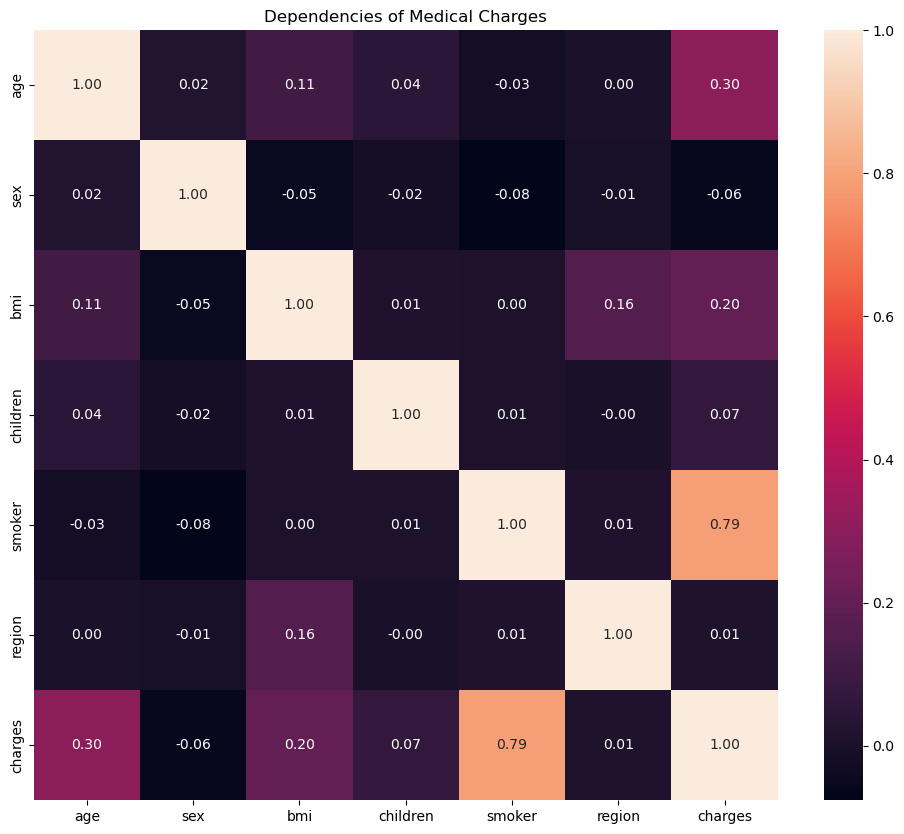

In [9]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

# Smoker age and Bmi are the most important factor that determines charges

Sex Region and Children do not effect the charges. So we can drop these three columns

In [10]:
print(df['sex'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())
print(df['children'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64
5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64


# Now we can confirm that there are no other values in above process now we can go through EDA

# EDA

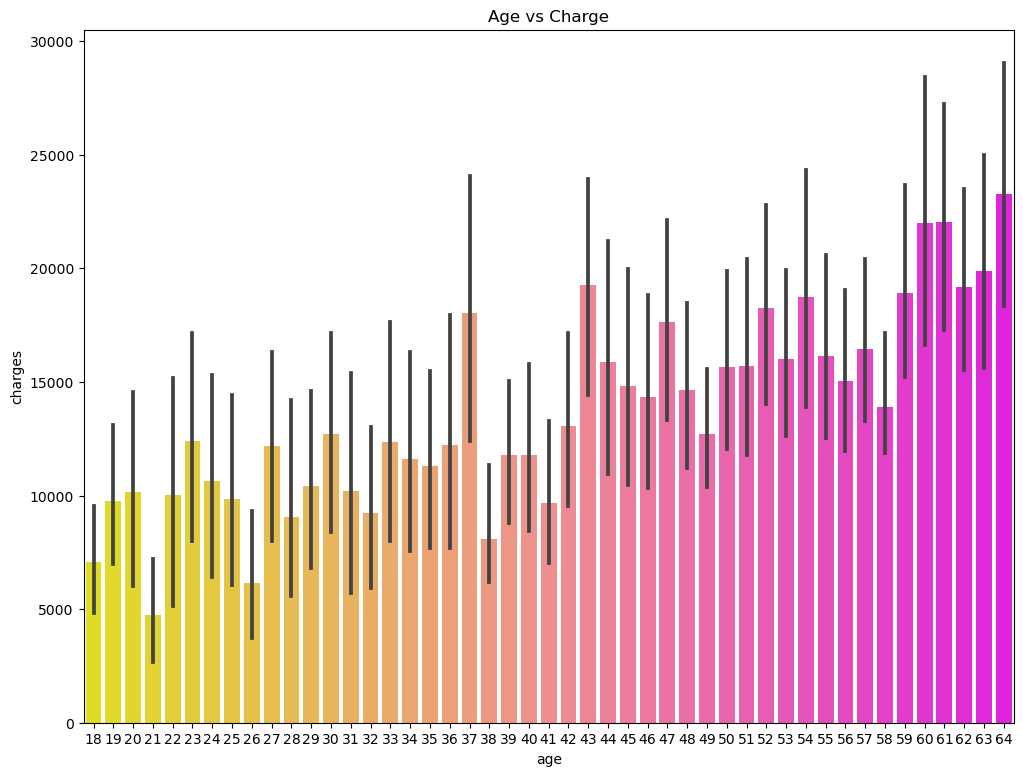

In [11]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df_copy,palette='spring_r')
plt.show()

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

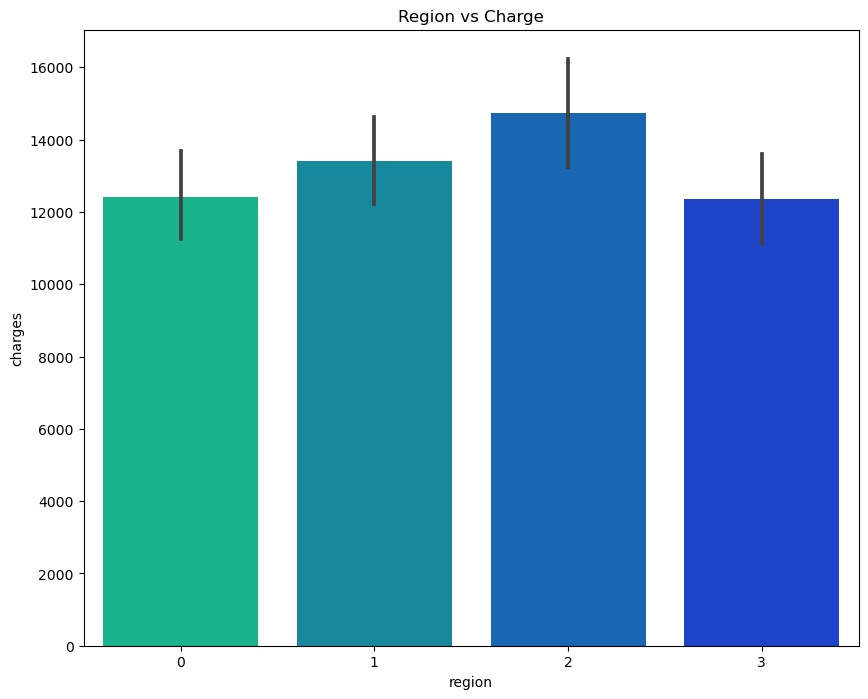

In [12]:
plt.figure(figsize=(10,8))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges', data=df_copy, palette='winter_r')

Text(0.5, 1.0, 'BMI VS Charge')

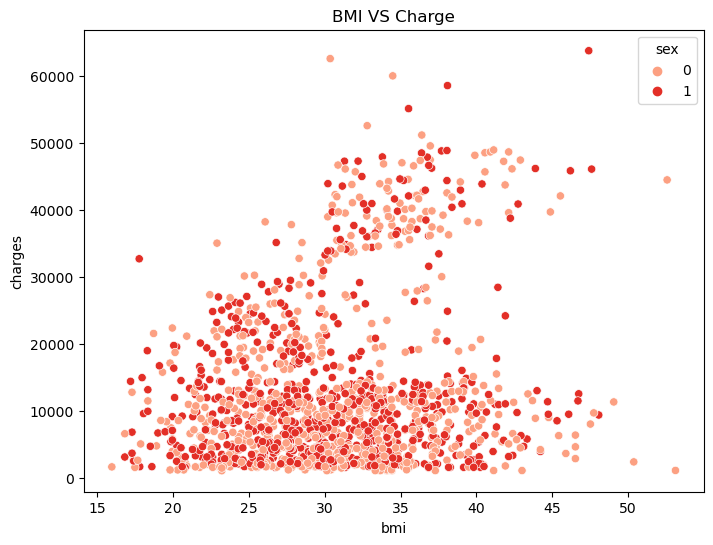

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df_copy,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

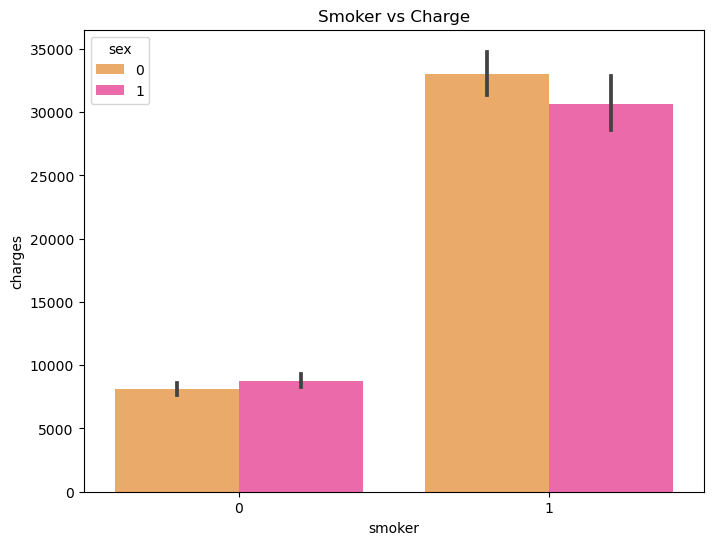

In [14]:
plt.figure(figsize=(8,6))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df_copy,palette='spring_r',hue='sex')

<Axes: title={'center': 'Sex vs Charge'}, xlabel='sex', ylabel='charges'>

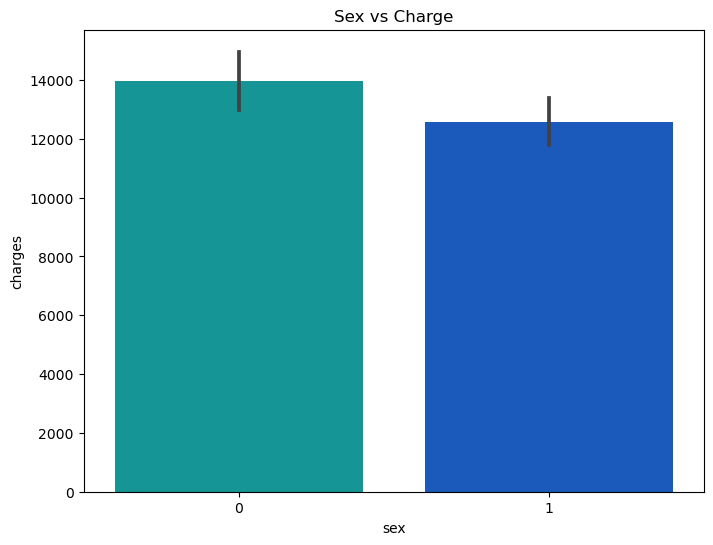

In [15]:
plt.figure(figsize=(8,6))
plt.title('Sex vs Charge')
sns.barplot(x='sex',y='charges',data=df_copy,palette='winter_r')

# Checking Skewness and Plotting Skew And Kurtosis

In [16]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(df_copy.columns):
    print('{0} : Skewness {1:.3f} and Kurtosis {2:.3f}'.format(col,df_copy[col].skew(),df_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and Kurtosis -1.245
sex : Skewness 0.021 and Kurtosis -2.003
bmi : Skewness 0.284 and Kurtosis -0.051
children : Skewness 0.938 and Kurtosis 0.202
smoker : Skewness 1.465 and Kurtosis 0.146
region : Skewness -0.038 and Kurtosis -1.329
charges : Skewness 1.516 and Kurtosis 1.606


Text(4.944444444444445, 0.5, 'Count')

<Figure size 1000x700 with 0 Axes>

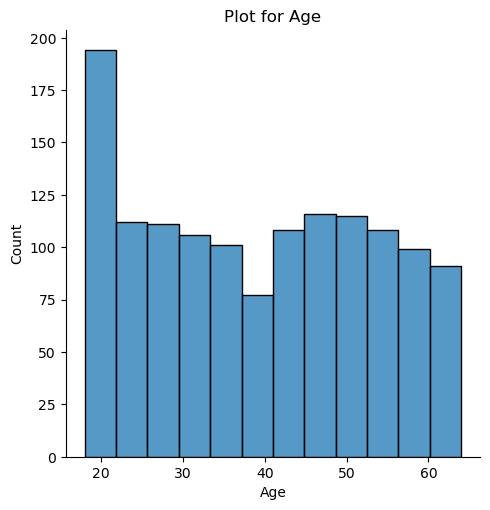

In [17]:
plt.figure(figsize=(10,7))
sns.displot(df_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(4.944444444444445, 0.5, 'Count')

<Figure size 1000x700 with 0 Axes>

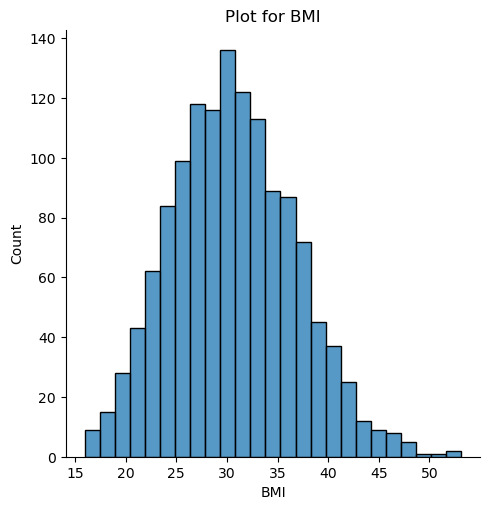

In [18]:
plt.figure(figsize=(10,7))
sns.displot(df_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(4.944444444444445, 0.5, 'Count')

<Figure size 1000x700 with 0 Axes>

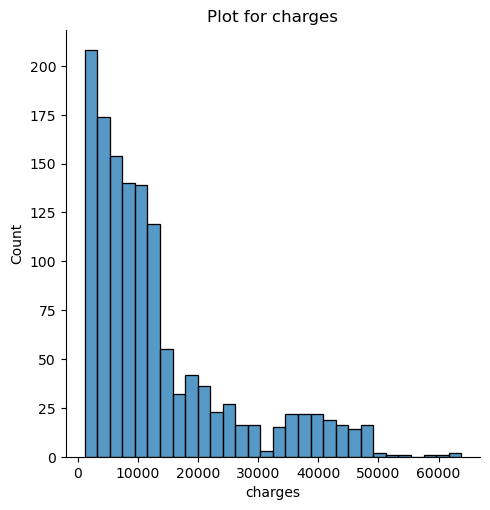

In [19]:
plt.figure(figsize=(10,7))
sns.displot(df_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

# There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually..

# Now we can scale BMI and Charges before proceeding for Predictions

# DataPreprocessing

In [20]:
from sklearn.preprocessing import StandardScaler
data_pre = df_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


# Modeling

In [21]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of y_test :  (268, 1)


# Importing Libraries

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [25]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 27.4 ms


LinearRegression()

In [26]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


# Support Vector Machine

In [27]:
X_c = df_copy.drop('charges',axis=1).values
y_c = df_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()
#svr.fit(X_train_scaled, y_train_scaled.ravel())

In [28]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [29]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311276912561496


In [30]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.831
R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.359


# Ridge Regressor

In [31]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [32]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

C:\Users\nehap\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14414e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nehap\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.99749e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [33]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [34]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.826
R2 score (train) : 0.741
R2 score (test) : 0.784
RMSE : 0.465


In [56]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),  
         ]

In [57]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479808,0.741410,0.782694,0.744528
1,Ridge Regression,0.465206,0.741150,0.783800,0.825999
2,Support Vector Regression,0.358769,0.857235,0.871285,0.831128


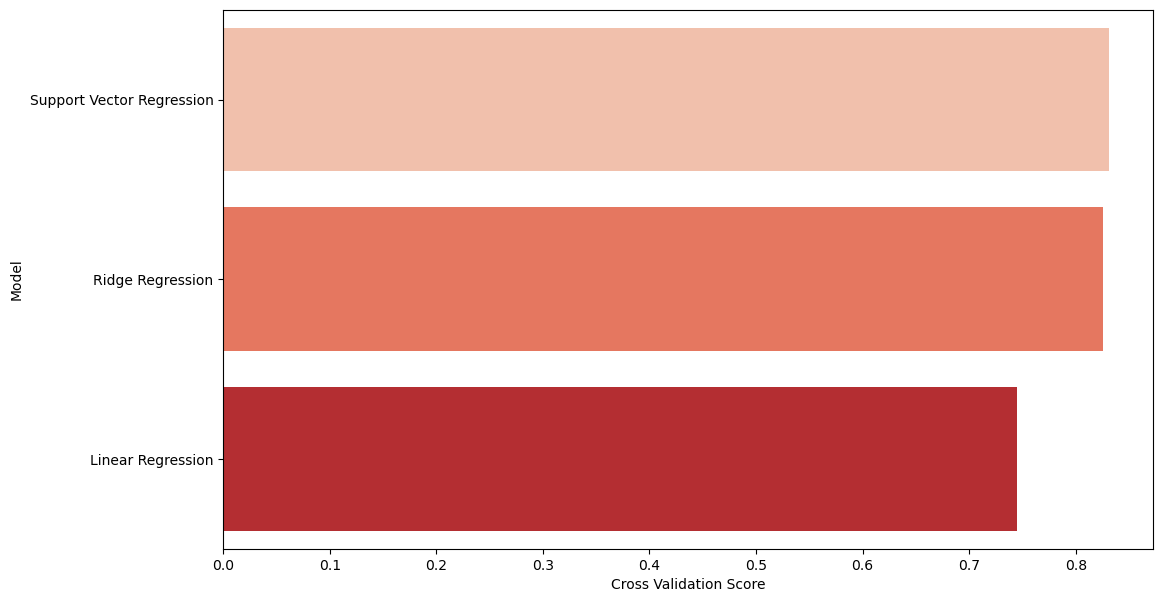

In [58]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [60]:
df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [62]:
X_ = df_copy.drop('charges',axis=1).values
y_ = df_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [63]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [64]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.884
R2 score (test) : 0.878


In [65]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [66]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [67]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [68]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

In [69]:
print('{0:.3f}'.format(pred))

19012.997
